In [1]:
import pandas as pd
import time
from transformers import AutoTokenizer
from is_turkish import get_is_turkish
from is_pure import get_is_pure



/Users/alibayram/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
df = pd.read_parquet("https://huggingface.co/datasets/alibayram/yapay_zeka_turkce_mmlu_model_cevaplari/resolve/main/data/train-00000-of-00001.parquet")

In [4]:
df = df[["soru", "secenekler"]]
text = ""
for _, row in df.iterrows():
    text += row["soru"] + "\n"  
    for secenek in row["secenekler"]:
        text += secenek + "\n"

len(text), len(text.split())

(1605376, 198193)

In [6]:
def score_tokenizer(text:str, tokenizer_score_map: dict):
  tokenizer = AutoTokenizer.from_pretrained(tokenizer_score_map["tokenizer"])
  tokenizer_score_map["vocab-size"] = len(tokenizer.get_vocab())
  time_start = time.time()

  token_ids = tokenizer.encode(text)
  tokenizer_score_map["tokens-count"] = len(token_ids)

  tokens = []

  for token_id in token_ids:
    try:
      token = tokenizer.decode(token_id)
      tokens.append(token)
    except:
      print("Error: ", token_id)

  time_end = time.time()

  tokenizer_score_map["time"] = round(time_end - time_start, 4)
  
  tokens = set(tokens)
  is_turkish_map = get_is_turkish(tokens)
  tokenizer_score_map["unique-token-count"] = len(is_turkish_map)

  # count of true values in is_turkish_map
  tokenizer_score_map["turkish-token-count"] = sum(is_turkish_map.values())
  tokenizer_score_map["turkish-token-percent"] = round(tokenizer_score_map["turkish-token-count"] / tokenizer_score_map["unique-token-count"], 4)

  is_pure_map = get_is_pure(" ".join(is_turkish_map.keys()))
  # count of true values in is_pure_map
  tokenizer_score_map["pure-token-count"] = sum(is_pure_map.values())
  tokenizer_score_map["pure-token-percent"] = round(tokenizer_score_map["pure-token-count"] / tokenizer_score_map["unique-token-count"], 4)
  

  return tokenizer_score_map

In [7]:
tokenizers = [
  "google/gemma-2-9b",
  "alibayram/tr_tokenizer",
  "AhmetSemih/tr_tokenizer",
  "aliarda/turkish_tokenizer_256k",
  "aliarda/turkish_tokenizer",
  "meta-llama/Llama-3.2-3B",
  "utter-project/EuroLLM-9B-Instruct",
  "Qwen/Qwen2.5-7B-Instruct",
  "CohereForAI/aya-expanse-8b",
  "openai-community/gpt2",
  "mistralai/Mistral-Nemo-Instruct-2407",
  "microsoft/Phi-3.5-mini-instruct",
  "microsoft/phi-4",
  "Trendyol/Trendyol-LLM-8b-chat-v2.0",
  "ytu-ce-cosmos/turkish-gpt2-large-750m-instruct-v0.1"
]

In [8]:
tokenizer_score_maps = []

for tokenizer in tokenizers:
  tokenizer_score_map = {
    "tokenizer": tokenizer
  }
  tokenizer_score_map = score_tokenizer(text, tokenizer_score_map)
  tokenizer_score_maps.append(tokenizer_score_map)
  print(tokenizer_score_map)

df = pd.DataFrame(tokenizer_score_maps)
df.to_csv("tokenizer_score_maps.csv", index=False)

/Users/alibayram/Library/Python/3.9/lib/python/site-packages/pip_system_certs/wrapt_requests.py:71: UserWarning: Failed to patch SSL settings for unverified requests (unsupported version of urllib3?)
This may lead to errors when urllib3 tries to modify verify_mode.
Please report an issue at https://gitlab.com/alelec/pip-system-certs with your
python version included in the description

  warnings.warn(


{'tokenizer': 'google/gemma-2-9b', 'vocab-size': 256000, 'tokens-count': 497015, 'time': 5.7147, 'unique-token-count': 9683, 'turkish-token-count': 3966, 'turkish-token-percent': 0.4096, 'pure-token-count': 2759, 'pure-token-percent': 0.2849}
{'tokenizer': 'alibayram/tr_tokenizer', 'vocab-size': 30158, 'tokens-count': 476556, 'time': 2.476, 'unique-token-count': 11531, 'turkish-token-count': 11342, 'turkish-token-percent': 0.9836, 'pure-token-count': 11055, 'pure-token-percent': 0.9587}
{'tokenizer': 'AhmetSemih/tr_tokenizer', 'vocab-size': 59572, 'tokens-count': 451883, 'time': 2.5466, 'unique-token-count': 13488, 'turkish-token-count': 13329, 'turkish-token-percent': 0.9882, 'pure-token-count': 12997, 'pure-token-percent': 0.9636}
{'tokenizer': 'aliarda/turkish_tokenizer_256k', 'vocab-size': 256000, 'tokens-count': 488267, 'time': 2.5455, 'unique-token-count': 13870, 'turkish-token-count': 13481, 'turkish-token-percent': 0.972, 'pure-token-count': 12981, 'pure-token-percent': 0.9359}

Token indices sequence length is longer than the specified maximum sequence length for this model (488535 > 131072). Running this sequence through the model will result in indexing errors


{'tokenizer': 'meta-llama/Llama-3.2-3B', 'vocab-size': 128256, 'tokens-count': 488535, 'time': 3.1483, 'unique-token-count': 6509, 'turkish-token-count': 2979, 'turkish-token-percent': 0.4577, 'pure-token-count': 2047, 'pure-token-percent': 0.3145}


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


tokenizer_config.json:   0%|          | 0.00/47.3k [00:00<?, ?B/s]

{'tokenizer': 'utter-project/EuroLLM-9B-Instruct', 'vocab-size': 128000, 'tokens-count': 497172, 'time': 3.2421, 'unique-token-count': 7424, 'turkish-token-count': 3108, 'turkish-token-percent': 0.4186, 'pure-token-count': 2198, 'pure-token-percent': 0.2961}


Token indices sequence length is longer than the specified maximum sequence length for this model (561866 > 131072). Running this sequence through the model will result in indexing errors


{'tokenizer': 'Qwen/Qwen2.5-7B-Instruct', 'vocab-size': 151665, 'tokens-count': 561866, 'time': 3.354, 'unique-token-count': 5509, 'turkish-token-count': 2225, 'turkish-token-percent': 0.4039, 'pure-token-count': 1689, 'pure-token-percent': 0.3066}
{'tokenizer': 'CohereForAI/aya-expanse-8b', 'vocab-size': 255029, 'tokens-count': 434526, 'time': 2.8084, 'unique-token-count': 7036, 'turkish-token-count': 3763, 'turkish-token-percent': 0.5348, 'pure-token-count': 2606, 'pure-token-percent': 0.3704}


/Users/alibayram/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (821139 > 1024). Running this sequence through the model will result in indexing errors


{'tokenizer': 'openai-community/gpt2', 'vocab-size': 50257, 'tokens-count': 821139, 'time': 4.5795, 'unique-token-count': 4830, 'turkish-token-count': 1898, 'turkish-token-percent': 0.393, 'pure-token-count': 1227, 'pure-token-percent': 0.254}
{'tokenizer': 'mistralai/Mistral-Nemo-Instruct-2407', 'vocab-size': 131072, 'tokens-count': 534930, 'time': 3.294, 'unique-token-count': 4626, 'turkish-token-count': 2034, 'turkish-token-percent': 0.4397, 'pure-token-count': 1614, 'pure-token-percent': 0.3489}


Token indices sequence length is longer than the specified maximum sequence length for this model (803971 > 131072). Running this sequence through the model will result in indexing errors


{'tokenizer': 'microsoft/Phi-3.5-mini-instruct', 'vocab-size': 32011, 'tokens-count': 803971, 'time': 4.8552, 'unique-token-count': 4185, 'turkish-token-count': 1642, 'turkish-token-percent': 0.3924, 'pure-token-count': 1253, 'pure-token-percent': 0.2994}


tokenizer_config.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/917k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.25M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (655187 > 16384). Running this sequence through the model will result in indexing errors


{'tokenizer': 'microsoft/phi-4', 'vocab-size': 100352, 'tokens-count': 655187, 'time': 3.73, 'unique-token-count': 5022, 'turkish-token-count': 1913, 'turkish-token-percent': 0.3809, 'pure-token-count': 1376, 'pure-token-percent': 0.274}
{'tokenizer': 'Trendyol/Trendyol-LLM-8b-chat-v2.0', 'vocab-size': 128256, 'tokens-count': 488535, 'time': 3.1419, 'unique-token-count': 6509, 'turkish-token-count': 2979, 'turkish-token-percent': 0.4577, 'pure-token-count': 2047, 'pure-token-percent': 0.3145}
{'tokenizer': 'ytu-ce-cosmos/turkish-gpt2-large-750m-instruct-v0.1', 'vocab-size': 50258, 'tokens-count': 339852, 'time': 2.6176, 'unique-token-count': 24136, 'turkish-token-count': 18592, 'turkish-token-percent': 0.7703, 'pure-token-count': 6591, 'pure-token-percent': 0.2731}


In [10]:
df

,tokenizer,vocab-size,tokens-count,time,unique-token-count,turkish-token-count,turkish-token-percent,pure-token-count,pure-token-percent
0,google/gemma-2-9b,256000,497015,5.7147,9683,3966,0.4096,2759,0.2849
1,alibayram/tr_tokenizer,30158,476556,2.4760,11531,11342,0.9836,11055,0.9587
2,AhmetSemih/tr_tokenizer,59572,451883,2.5466,13488,13329,0.9882,12997,0.9636
3,aliarda/turkish_tokenizer_256k,256000,488267,2.5455,13870,13481,0.9720,12981,0.9359
4,aliarda/turkish_tokenizer,58526,451936,2.3664,13389,13236,0.9886,12996,0.9706
5,meta-llama/Llama-3.2-3B,128256,488535,3.1483,6509,2979,0.4577,2047,0.3145
6,utter-project/EuroLLM-9B-Instruct,128000,497172,3.2421,7424,3108,0.4186,2198,0.2961
7,Qwen/Qwen2.5-7B-Instruct,151665,561866,3.3540,5509,2225,0.4039,1689,0.3066
8,CohereForAI/aya-expanse-8b,255029,434526,2.8084,7036,3763,0.5348,2606,0.3704
9,openai-community/gpt2,50257,821139,4.5795,4830,1898,0.3930,1227,0.2540


In [1]:
import tiktoken
enc = tiktoken.get_encoding("o200k_base")
assert enc.decode(enc.encode("hello world")) == "hello world"

# To get the tokeniser corresponding to a specific model in the OpenAI API:
enc = tiktoken.encoding_for_model("gpt-4o")
enc.decode([43519, 95938])

/Users/alibayram/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


' Risk yönet'

In [ ]:
# save vocabs to disk
tokens = []
for i in range(0, enc.n_vocab):
  try:
    tokens.append(enc.decode([i]))
  except:
    print("Error: ", i)
tokens

In [9]:
len(tokens)

200000

In [4]:
def score_openai_tokenizer(text:str, tokenizer_score_map: dict):

  tokenizer_score_map["vocab-size"] = enc.n_vocab
  time_start = time.time()

  token_ids = enc.encode(text)
  tokenizer_score_map["tokens-count"] = len(token_ids)

  tokens = []

  for token_id in token_ids:
    try:
      token = enc.decode([token_id])
      tokens.append(token)
    except:
      print("Error: ", token_id)

  time_end = time.time()

  tokenizer_score_map["time"] = round(time_end - time_start, 4)
  
  tokens = set(tokens)
  is_turkish_map = get_is_turkish(tokens)
  tokenizer_score_map["unique-token-count"] = len(is_turkish_map)

  # count of true values in is_turkish_map
  tokenizer_score_map["turkish-token-count"] = sum(is_turkish_map.values())
  tokenizer_score_map["turkish-token-percent"] = round(tokenizer_score_map["turkish-token-count"] / tokenizer_score_map["unique-token-count"], 4)

  is_pure_map = get_is_pure(" ".join(is_turkish_map.keys()))
  # count of true values in is_pure_map
  tokenizer_score_map["pure-token-count"] = sum(is_pure_map.values())
  tokenizer_score_map["pure-token-percent"] = round(tokenizer_score_map["pure-token-count"] / tokenizer_score_map["unique-token-count"], 4)
  

  return tokenizer_score_map

In [ ]:
openai_tokenizer_score_map = {
  "tokenizer": "openai/o200k_base-gpt-4o"
}

openai_tokenizer_score_map = score_openai_tokenizer(text, openai_tokenizer_score_map)

/Users/alibayram/Library/Python/3.9/lib/python/site-packages/pip_system_certs/wrapt_requests.py:71: UserWarning: Failed to patch SSL settings for unverified requests (unsupported version of urllib3?)
This may lead to errors when urllib3 tries to modify verify_mode.
Please report an issue at https://gitlab.com/alelec/pip-system-certs with your
python version included in the description

  warnings.warn(


In [ ]:
df = pd.read_csv("tokenizer_score_maps.csv")
df = pd.concat([df, pd.DataFrame([openai_tokenizer_score_map])])
df.to_csv("tokenizer_score_maps.csv", index=False)
df

,tokenizer,vocab-size,tokens-count,time,unique-token-count,turkish-token-count,turkish-token-percent,pure-token-count,pure-token-percent
0,google/gemma-2-9b,256000,497015,2.9500,6383,3104,0.4863,2365,0.3705
1,alibayram/tr_tokenizer,30158,476556,2.4231,11531,11342,0.9836,11055,0.9587
2,AhmetSemih/tr_tokenizer,59572,451883,2.4849,13370,13253,0.9912,13357,0.9990
3,aliarda/turkish_tokenizer_256k,256000,488267,2.5124,13631,13351,0.9795,12981,0.9523
4,aliarda/turkish_tokenizer,58526,451936,2.3406,13268,13170,0.9926,13256,0.9991
5,meta-llama/Llama-3.2-3B,128256,488535,3.1249,6823,3125,0.4580,2109,0.3091
6,utter-project/EuroLLM-9B-Instruct,128000,497173,3.2019,5226,2457,0.4701,1838,0.3517
7,Qwen/Qwen2.5-7B-Instruct,151665,561866,3.3150,5752,2320,0.4033,1734,0.3015
8,CohereForAI/aya-expanse-8b,255029,434526,2.7651,8562,4338,0.5067,2822,0.3296
9,openai-community/gpt2,50257,821139,4.3765,3454,1582,0.4580,1119,0.3240


In [24]:
import pandas as pd

df = pd.read_csv("yapay_zeka_turkce_mmlu_liderlik_tablosu.csv")
# remove format, quantization_level, dogru_cevap_sayisi, toplam_sure columns
# df = df.drop(columns=["format", "quantization_level", "dogru_cevap_sayisi", "toplam_sure"])
df

,model,family,parameter_size,basari
0,gpt-4o,GPT,Unknown,84.84
1,gemma2:27b,gemma2,27.2B,72.10
2,aya-expanse:32b,command-r,32.3B,70.66
3,llama3.1:70b,llama,70.6B,70.42
4,qwen2.5:latest,qwen2,7.6B,61.68
5,alibayram/erurollm-9b-instruct:latest,llama,9.2B,51.29
6,mistral-nemo:latest,llama,12.2B,46.89
7,phi3.5:latest,phi3,3.8B,29.37


In [23]:
df.to_csv("yapay_zeka_turkce_mmlu_liderlik_tablosu.csv", index=False)

In [26]:
df_tokenizer_score_maps = pd.read_csv("tokenizer_score_maps_copy.csv")
# df = df.drop(columns=["format", "quantization_level", "dogru_cevap_sayisi", "toplam_sure"])
df_tokenizer_score_maps.drop(columns=["turkish-token-count", "pure-token-count"], inplace=True)
df_tokenizer_score_maps

,tokenizer,mmlu_model_parameter_size,mmlu_score,vocab-size,tokens-count,time,unique-token-count,turkish-token-percent,pure-token-percent
0,google/gemma-2,27.2,72.10,256000,497015,2.9500,6383,0.4863,0.3705
1,meta-llama/Llama-3.1,70.6,70.42,128256,488535,3.1249,6823,0.4580,0.3091
2,Qwen/Qwen2.5,7.6,61.68,151665,561866,3.3150,5752,0.4033,0.3015
3,CohereForAI/aya-expanse,32.3,70.66,255029,434526,2.7651,8562,0.5067,0.3296


In [27]:
df_tokenizer_score_maps.sort_values(by="mmlu_score", ascending=False, inplace=True)
df_tokenizer_score_maps

,tokenizer,mmlu_model_parameter_size,mmlu_score,vocab-size,tokens-count,time,unique-token-count,turkish-token-percent,pure-token-percent
0,google/gemma-2,27.2,72.10,256000,497015,2.9500,6383,0.4863,0.3705
3,CohereForAI/aya-expanse,32.3,70.66,255029,434526,2.7651,8562,0.5067,0.3296
1,meta-llama/Llama-3.1,70.6,70.42,128256,488535,3.1249,6823,0.4580,0.3091
2,Qwen/Qwen2.5,7.6,61.68,151665,561866,3.3150,5752,0.4033,0.3015


In [29]:
# correlate mmlu_score with pure-token-percent
df_tokenizer_score_maps["mmlu_score"].corr(df_tokenizer_score_maps["turkish-token-percent"])


0.9000921961432893

In [32]:
# correlation matrix except tokenizer column
df_tokenizer_score_maps.drop(columns=["tokenizer"]).corr()


,mmlu_model_parameter_size,mmlu_score,vocab-size,tokens-count,time,unique-token-count,turkish-token-percent,pure-token-percent
mmlu_model_parameter_size,1.000000,0.590637,-0.341501,-0.463568,-0.164839,0.296193,0.326698,-0.115860
mmlu_score,0.590637,1.000000,0.535694,-0.796516,-0.783467,0.549491,0.900092,0.683824
vocab-size,-0.341501,0.535694,1.000000,-0.566517,-0.830562,0.506479,0.767041,0.816121
tokens-count,-0.463568,-0.796516,-0.566517,1.000000,0.929403,-0.942639,-0.933137,-0.342928
time,-0.164839,-0.783467,-0.830562,0.929403,1.000000,-0.860766,-0.975925,-0.602182
unique-token-count,0.296193,0.549491,0.506479,-0.942639,-0.860766,1.000000,0.799049,0.112232
turkish-token-percent,0.326698,0.900092,0.767041,-0.933137,-0.975925,0.799049,1.000000,0.657718
pure-token-percent,-0.115860,0.683824,0.816121,-0.342928,-0.602182,0.112232,0.657718,1.000000


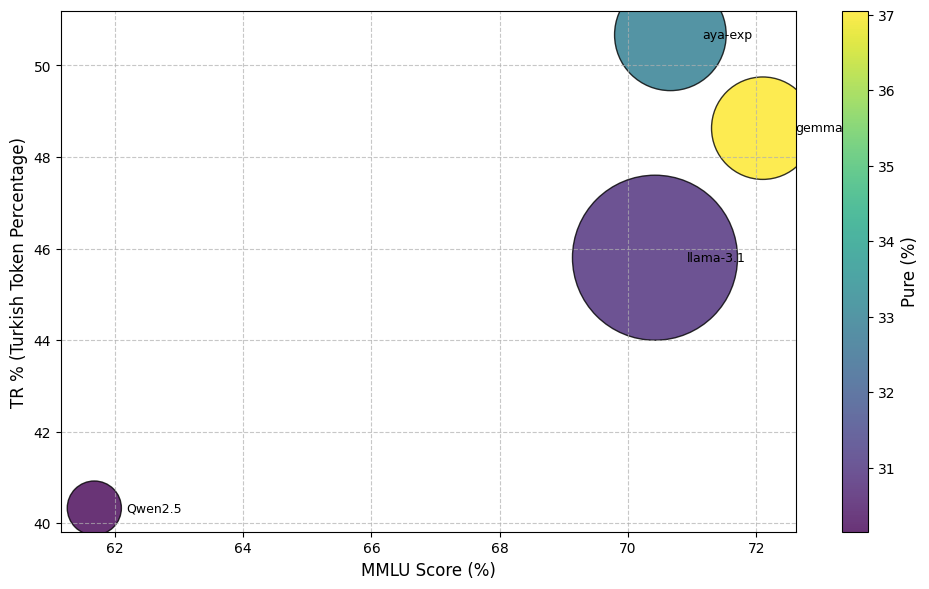

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the analysis
tokenizers = ['gemma-2', 'llama-3.1', 'Qwen2.5', 'aya-exp']
mmlu_scores = [72.10, 70.42, 61.68, 70.66]
tr_percent = [48.63, 45.80, 40.33, 50.67]
pure_percent = [37.05, 30.91, 30.15, 32.96]

# Parameter sizes (in billions), with None for unknown
parameter_sizes = [27.2, 70.6, 7.6, 32.3]  #

# Determine a default size for the unknown parameter
# For example, use the median of known sizes
known_sizes = [p for p in parameter_sizes if p is not None]
default_size = np.median(known_sizes)

# Replace None with default size
parameter_sizes = [default_size if p is None else p for p in parameter_sizes]

# Normalize sizes for plotting
size_scale = 200
marker_sizes = [p * size_scale for p in parameter_sizes]

fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with color mapped to Pure%
sc = ax.scatter(mmlu_scores, tr_percent, c=pure_percent, s=marker_sizes, 
                cmap='viridis', alpha=0.8, edgecolor='black')

# Add text labels for each point
for i, tok in enumerate(tokenizers):
    label_text = tok
    ax.text(mmlu_scores[i] + 0.5, tr_percent[i], label_text, fontsize=9, va='center')

# Colorbar for Pure%
cbar = plt.colorbar(sc)
cbar.set_label('Pure (%)', fontsize=12)

# Set axes labels and title
ax.set_xlabel('MMLU Score (%)', fontsize=12)
ax.set_ylabel('TR % (Turkish Token Percentage)', fontsize=12)
# ax.set_title('Model Comparison: MMLU vs TR%, Parameter Size (Unknown for gpt4o), and Pure%', fontsize=14)

# Optional grid
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()


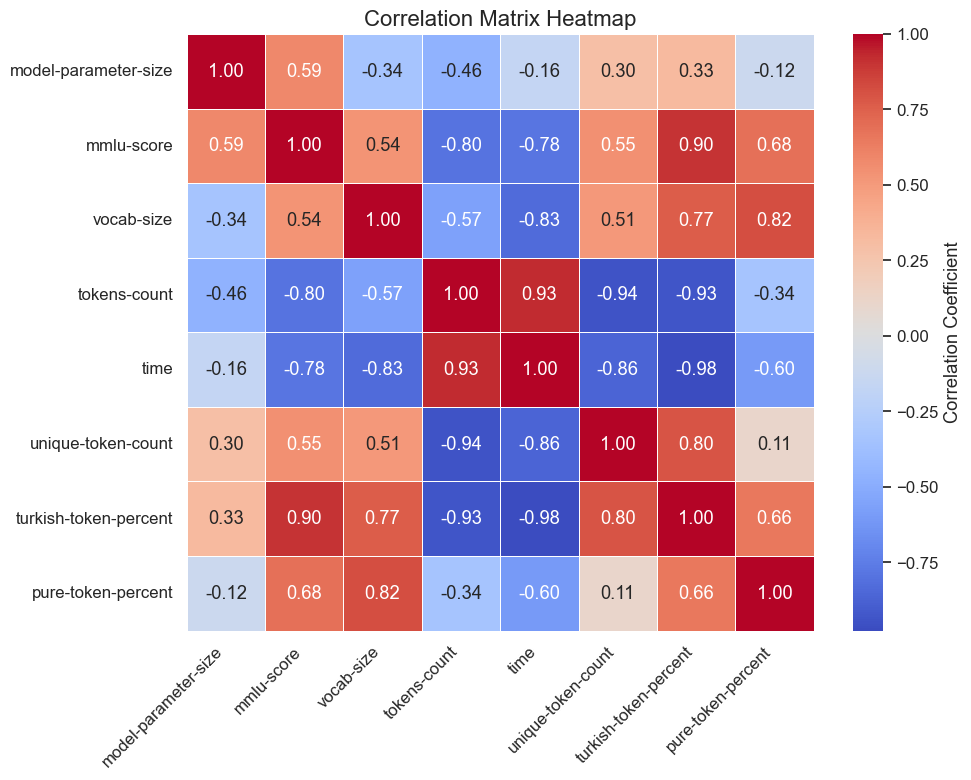

In [38]:
import seaborn as sns

# Create the DataFrame
data = {
    "tokenizer": ["google/gemma-2", "CohereForAI/aya-expanse", "meta-llama/Llama-3.1", "Qwen/Qwen2.5"],
    "model-parameter-size": [27.2, 32.3, 70.6, 7.6],
    "mmlu-score": [72.10, 70.66, 70.42, 61.68],
    "vocab-size": [256000, 255029, 128256, 151665],
    "tokens-count": [497015, 434526, 488535, 561866],
    "time": [2.9500, 2.7651, 3.1249, 3.3150],
    "unique-token-count": [6383, 8562, 6823, 5752],
    "turkish-token-percent": [0.4863, 0.5067, 0.4580, 0.4033],
    "pure-token-percent": [0.3705, 0.3296, 0.3091, 0.3015],
}

df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.drop(columns=["tokenizer"]).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"},
    linewidths=0.5
)

# Add title and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()